# Exemplu de utilizare a implementarii algoritmului Viola Jones in opencv

Acest cod nu implementeaza metoda Viola Jones și nici nu antrenează un model. Acest cod folosește un model deja antrenat pentru a exemplifica detecția cu ajutorul acestui algoritm.

In [ ]:
from google.colab import files
from IPython.display import display
import cv2
from google.colab.patches import cv2_imshow

## Incarcarea modelului antrenat

In [ ]:
print("Incarcati un model HAAR opencv (de obicei numit haarcascade_frontalface_default.xml)")
uploaded = files.upload()
model_path = list(uploaded.keys())[0]

Upload a face HAAR openCV model (usually named haarcascade_frontalface_default.xml)


Saving haarcascade_frontalface_default.xml to haarcascade_frontalface_default.xml


## Inițializarea clasificatorului

In [ ]:
haarcascade_face = cv2.CascadeClassifier(model_path)

## Incarcarea imaginii de test

Saving pexels-ivan-samkov-4625070.jpg to pexels-ivan-samkov-4625070 (1).jpg


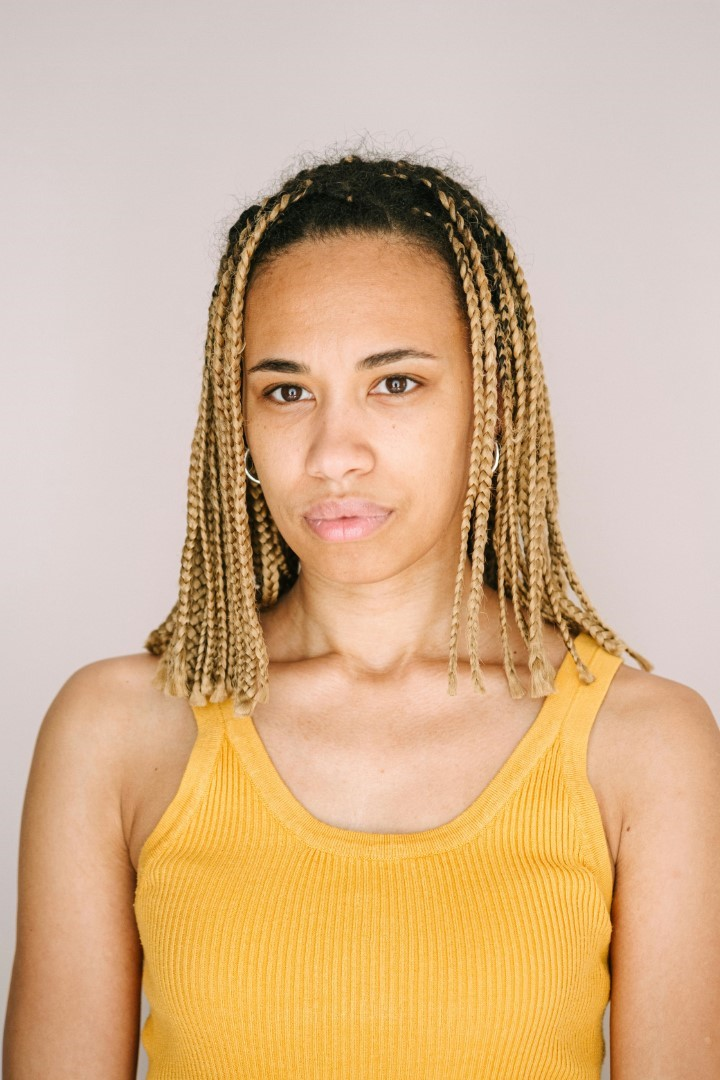

In [ ]:
uploaded = files.upload()  # Allows user to upload a file
# Get the first uploaded file
image_path = list(uploaded.keys())[0]
img = cv2.imread(image_path)
if img is not None:
      cv2_imshow(img)

## Parametrii detectiei

**scaleFactor=hsff**

Factor de scalare între dimensiunile imaginii la fiecare pas din piramida de imagini. Exemplu: 1.1 înseamnă că imaginea este micșorată cu 10% la fiecare pas.Valori mai apropiate de 1.0 cresc precizia dar și timpul de procesare.

**minNeighbors=hmnf**

Numărul minim de vecini pentru ca un dreptunghi să fie reținut ca fiind față.Valori mai mari duc la mai puține detecții false, dar pot rata unele fețe reale.

**minSize=(min_dim, min_dim)**

Dimensiunea minimă (lățime, înălțime) a unei fețe pentru a fi detectată. Este util pentru a ignora obiecte foarte mici din imagine care nu pot fi fețe.

In [ ]:
hmsf = 10
hmnf = 50
hsff = 1.025

In [ ]:
height, width, _ = img.shape
edge_width = 2 + max(1, int(width / 100))
min_dim = min(width, height) // hmsf
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = haarcascade_face.detectMultiScale(
        gray,
        scaleFactor=hsff,
        minNeighbors=hmnf,
        minSize=(min_dim, min_dim)
)

## Afișarea feței detectate

In [ ]:
if len(faces) > 0:
   for i, (x, y, w, h) in enumerate(faces):
       cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), thickness=edge_width)

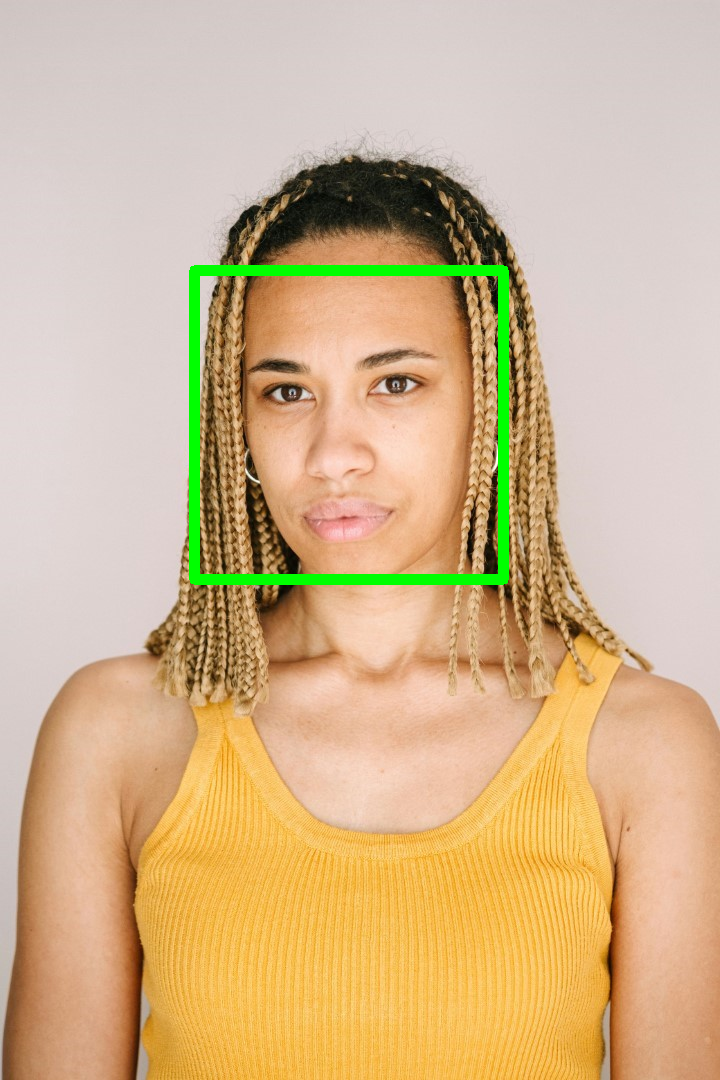

In [ ]:
cv2_imshow(img)